In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import math

### Zadanie1: Zaimplementuj algorytm grupowania górskiego Zastosuj do poniższych danych.

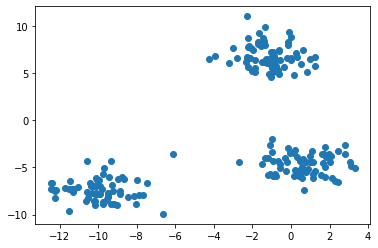

In [59]:
X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [98]:
def funkcja_gorska(x, c, sigma, b = 1): 
    suma = 0
    for vec in x: 
        dist = np.linalg.norm(c-vec)  # ||c - x||   
        suma += np.exp(-dist**(2*b)/(2*sigma**2))
    return suma   

In [99]:
#wyznaczam wartosc g(c) dla potencjalnych centrow
# wieksza wartosc g(c) -> wiecej wektorow wokol potencjalnego centrum 

g = []
for centrum in X: 
    g.append([centrum, funkcja_gorska(x = X, c = centrum, sigma = 0.01)])
    

In [106]:
# tu nalezy wybrac najwieksze g(c) co bedzie naszym centrum 1 (c1)

largest_g = [0,0]

for elem in g:
    if elem[1] > largest_g[1]:
        largest_g[0] = elem[0]
        largest_g[1] = elem[1]
        
print(largest_g)

[array([5.14763163, 0.8886503 ]), 2.1727823499921617]


In [115]:
# trzeba wyeleminwac c1 i wektory obok
# g_new(c) = g(c) - g(c1)*exp(-||c - c1||**2b / 2*sigma**2)

c1 = largest_g[0]
b = 1
sigma = 0.01

g_new = []
for centrum, g_old in zip(X, g):
    
    g_c1 = funkcja_gorska(X, c1, sigma = 0.01, b = 1)
    dist = np.linalg.norm(centrum - c1)
                          
    g_new.append([centrum, g_old - g_c1*np.exp(-dist**(2*b)/(2*sigma**2))])


/Users/liza/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [125]:
# implementacja algorytmu

class MountainClustering:
    def __init__(self, sigma = 0.001, b = 1):
        self.sigma = sigma
        self.b = b
        
        
    def mountain_function(self, x_data, c): 
        suma = 0
        for x in x_data: 
            dist = np.linalg.norm(c-x)  # ||c - x||   
            suma += np.exp(-dist**(2*self.b)/(2*self.sigma**2))
        return suma   
    
    
    def find_centrum(self, g_list):
        largest_g = [0,0]

        for elem in g_list:
            if elem[1] > largest_g[1]:
                largest_g[0] = elem[0]
                largest_g[1] = elem[1]
                
        return largest_g
    
    
    def mountain_function_new(self, x_data): #tu cos poszlo nie tak
        
        g_list = [] # g(c) dla wszystkich poncjalnych centrow 
        for centrum in x_data: 
            g_list.append([centrum, self.mountain_function(x_data, c = centrum)])
            
        c1 = self.find_centrum(g_list) #definiujemy pierwszy centrum 
        c1 = c1[0]
        
        g_c1 = self.mountain_function(x_data, c1) # wartosc g dla pierwszego c
        
        
        g_new = []
        for centrum in x_data: 
            g_old = self.mountain_function(x_data, centrum)
            g_new = g_old - g_c1*np.exp(-dist**(2*self.b)/(2*self.sigma**2))
            g_new.append([centrum, g_new])
         
        return g_new       

In [126]:
algorithm = MountainClustering()
algorithm.mountain_function_new(X)

AttributeError: 'numpy.float64' object has no attribute 'append'

### Zadanie2: Zaimplementuj algorytm Gustafsona-Kessela. Zastosuj go do poniższych danych - algorytm powinien sobie poradzić z poprawną klasyfikacją.

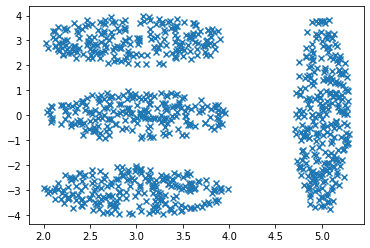

In [72]:
n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []
for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(X[:,0],X[:,1], marker = "x")
plt.show()

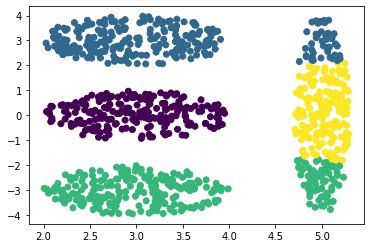

In [73]:
#dla porownania K-means, ktory ma problem z tego typu danymi

kmeans = KMeans(n_clusters=4)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show() 